## Case Study #1: Electric Vehicle Data Analysis Project
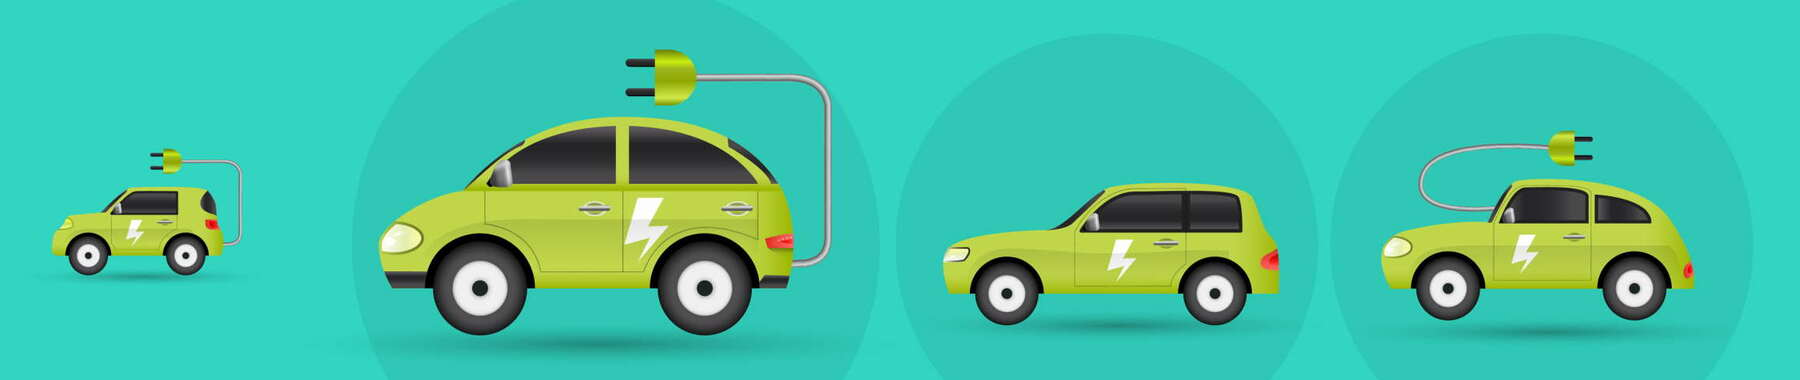
### <u>Project Overview
In this project, we will analyze a dataset related to electric vehicles (EVs). The dataset contains various features such as electric range, energy consumption, price, and other relevant attributes. Your goal is to conduct a thorough analysis to uncover meaningful insights, tell a compelling story, conduct hypothesis testing and provide actionable recommendations based on the data.

**Dataset: [FEV-data-Excel.xlsx](https://docs.google.com/spreadsheets/d/17I47pSX87vzBwrJGZvNMNdVv_Jg5pHI9/edit?rtpof=true&sd=true)**

**<u>Dataset Overview**

- **Car full name:** The full name or designation of the vehicle, often combining make, model, and variant.
- **Make:** The brand or manufacturer of the car.
- **Model:** The specific model or version of the car.
- **Minimal price (gross) [PLN]:** The minimum retail price of the car, in Polish złoty (PLN).
- **Engine power [KM]:** The car's engine power, measured in horsepower (KM in Polish).
- **Maximum torque [Nm]:** The peak torque the engine can produce, measured in Newton-meters(Nm).
- **Type of brakes:** The braking system used, such as disc or drum brakes.
- **Drive type:** The drivetrain configuration, like FWD (front-wheel drive), RWD (rear-wheel drive),or AWD (all-wheel drive).
- **Battery capacity [kWh]:** Total energy capacity of the car’s battery, measured in kilowatt-hours(kWh).
- **Range (WLTP) [km]:** Estimated driving range on a full charge under WLTP standards, in kilometers.
- **Wheelbase [cm]:** The distance between the front and rear axles, in centimeters.
- **Length [cm]:** The overall length of the car, in centimeters.
- **Width [cm]:** The car’s width, in centimeters.
- **Height [cm]:** The car’s height, in centimeters.
- **Minimal empty weight [kg]:** The car’s minimum weight when empty, measured in kilograms.
- **Permissible gross weight [kg]:** Maximum legally allowed weight, including passengers and cargo, in kilograms.
- **Maximum load capacity [kg]:** The maximum weight the car can carry, in kilograms.
- **Number of seats:** The number of passenger seats in the car.
- **Number of doors:** The number of doors on the car.
- **Tire size [in]:** The tire size, measured in inches.
- **Maximum speed [kph]:** The top speed of the car, in kilometers per hour.
- **Boot capacity (VDA) [l]:** Trunk or cargo space capacity, measured in liters according to VDA standards.
- **Acceleration 0-100 kph [s]:** Time taken to accelerate from 0 to 100 kilometers per hour, in seconds.
- **Maximum DC charging power [kW]:** The highest charging power supported when using a DC fast charger, in kilowatts (kW).
- **Mean - Energy consumption [kWh/100 km]:** Average energy consumption per 100 kilometers, in kilowatt-hours (kWh).

Source: Electric vehicle - [wikipedia](https://en.wikipedia.org/wiki/Electric_vehicle#Energy_and_motors)
>The electric range of an EV represents how far it can travel on one full battery charge, while energy consumption indicates how much electrical energy the vehicle needs to cover a certain distance, often measured in kWh per 100 km or miles per kWh.

---

## Asking Questions
Based on dataset, we are interested to know:

- Q1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
- Q2: We suspect some EVs have unusually high or low energy consumption. Find the outliers in the mean - Energy consumption [kWh/100 km] column.
- Q3: Our manager wants to know if there's a strong relationship between battery capacity and range.
- Q4: Build an EV recommendation class.
- Q5: Inferential Statistics – Hypothesis Testing between two manufactures.

---

**Assessing Data**
We import the required libraries and load the EV dataset.

- Numpy - Data arrays
- Pandas - Data manipulation
- Matplotlib & Seaborn - Data visualisation

In [88]:
# Import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind

#Load xlsx
df = pd.read_excel('FEV-data-Excel.xlsx')

In [89]:
# preview ev dataset
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [90]:
# Check the size of dataset
df.shape

(53, 25)

In [91]:
# duplicate rows
df.duplicated().sum()

np.int64(0)

In [92]:
# datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


From df.info(), we can see that some features have missing values, hence we will run df.isnull().sum() to find out which feature has missing values and how many are there.



In [93]:
# missing values
df.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

Some of the features have 1, 3, 8 and 9 null values.

In [94]:
# number of non-null unique values for features in dataset
df.nunique()

Car full name                             53
Make                                      20
Model                                     53
Minimal price (gross) [PLN]               50
Engine power [KM]                         27
Maximum torque [Nm]                       31
Type of brakes                             2
Drive type                                 3
Battery capacity [kWh]                    24
Range (WLTP) [km]                         47
Wheelbase [cm]                            29
Length [cm]                               34
Width [cm]                                30
Height [cm]                               36
Minimal empty weight [kg]                 46
Permissable gross weight [kg]             35
Maximum load capacity [kg]                35
Number of seats                            6
Number of doors                            3
Tire size [in]                             8
Maximum speed [kph]                       21
Boot capacity (VDA) [l]                   31
Accelerati

In [95]:
# converting all columns name to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['car full name', 'make', 'model', 'minimal price (gross) [pln]',
       'engine power [km]', 'maximum torque [nm]', 'type of brakes',
       'drive type', 'battery capacity [kwh]', 'range (wltp) [km]',
       'wheelbase [cm]', 'length [cm]', 'width [cm]', 'height [cm]',
       'minimal empty weight [kg]', 'permissable gross weight [kg]',
       'maximum load capacity [kg]', 'number of seats', 'number of doors',
       'tire size [in]', 'maximum speed [kph]', 'boot capacity (vda) [l]',
       'acceleration 0-100 kph [s]', 'maximum dc charging power [kw]',
       'mean - energy consumption [kwh/100 km]'],
      dtype='object')

In [96]:
# Clean up column names: replace spaces with underscores for easier access in code
df.columns = [cols.replace(' ','_')for cols in df.columns]
df.columns

Index(['car_full_name', 'make', 'model', 'minimal_price_(gross)_[pln]',
       'engine_power_[km]', 'maximum_torque_[nm]', 'type_of_brakes',
       'drive_type', 'battery_capacity_[kwh]', 'range_(wltp)_[km]',
       'wheelbase_[cm]', 'length_[cm]', 'width_[cm]', 'height_[cm]',
       'minimal_empty_weight_[kg]', 'permissable_gross_weight_[kg]',
       'maximum_load_capacity_[kg]', 'number_of_seats', 'number_of_doors',
       'tire_size_[in]', 'maximum_speed_[kph]', 'boot_capacity_(vda)_[l]',
       'acceleration_0-100_kph_[s]', 'maximum_dc_charging_power_[kw]',
       'mean_-_energy_consumption_[kwh/100_km]'],
      dtype='object')

In [97]:
df.describe()

,minimal_price_(gross)_[pln],engine_power_[km],maximum_torque_[nm],battery_capacity_[kwh],range_(wltp)_[km],wheelbase_[cm],length_[cm],width_[cm],height_[cm],minimal_empty_weight_[kg],permissable_gross_weight_[kg],maximum_load_capacity_[kg],number_of_seats,number_of_doors,tire_size_[in],maximum_speed_[kph],boot_capacity_(vda)_[l],acceleration_0-100_kph_[s],maximum_dc_charging_power_[kw],mean_-_energy_consumption_[kwh/100_km]
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,45.000000,45.000000,53.000000,53.000000,53.000000,53.000000,52.000000,50.00000,53.000000,44.000000
mean,246158.509434,269.773585,460.037736,62.366038,376.905660,273.581132,442.509434,186.241509,155.422642,1868.452830,2288.844444,520.466667,4.905660,4.849057,17.679245,178.169811,445.096154,7.36000,113.509434,18.994318
std,149187.485190,181.298589,261.647000,24.170913,118.817938,22.740518,48.863280,14.280641,11.275358,470.880867,557.796026,140.682848,0.838133,0.455573,1.868500,43.056196,180.178480,2.78663,57.166970,4.418253
min,82050.000000,82.000000,160.000000,17.600000,148.000000,187.300000,269.500000,164.500000,137.800000,1035.000000,1310.000000,290.000000,2.000000,3.000000,14.000000,123.000000,171.000000,2.50000,22.000000,13.100000
25%,142900.000000,136.000000,260.000000,40.000000,289.000000,258.800000,411.800000,178.800000,148.100000,1530.000000,1916.000000,440.000000,5.000000,5.000000,16.000000,150.000000,315.000000,4.87500,100.000000,15.600000
50%,178400.000000,204.000000,362.000000,58.000000,364.000000,270.000000,447.000000,180.900000,155.600000,1685.000000,2119.000000,486.000000,5.000000,5.000000,17.000000,160.000000,425.000000,7.70000,100.000000,17.050000
75%,339480.000000,372.000000,640.000000,80.000000,450.000000,290.000000,490.100000,193.500000,161.500000,2370.000000,2870.000000,575.000000,5.000000,5.000000,19.000000,200.000000,558.000000,9.37500,150.000000,23.500000
max,794000.000000,772.000000,1140.000000,100.000000,652.000000,327.500000,514.000000,255.800000,191.000000,2710.000000,3500.000000,1056.000000,8.000000,5.000000,21.000000,261.000000,870.000000,13.10000,270.000000,28.200000


### Handle Missing Values

In [98]:
# Separate numerical and categorical variables
num_col = df.dtypes[df.dtypes!='object'].index
num_col

Index(['minimal_price_(gross)_[pln]', 'engine_power_[km]',
       'maximum_torque_[nm]', 'battery_capacity_[kwh]', 'range_(wltp)_[km]',
       'wheelbase_[cm]', 'length_[cm]', 'width_[cm]', 'height_[cm]',
       'minimal_empty_weight_[kg]', 'permissable_gross_weight_[kg]',
       'maximum_load_capacity_[kg]', 'number_of_seats', 'number_of_doors',
       'tire_size_[in]', 'maximum_speed_[kph]', 'boot_capacity_(vda)_[l]',
       'acceleration_0-100_kph_[s]', 'maximum_dc_charging_power_[kw]',
       'mean_-_energy_consumption_[kwh/100_km]'],
      dtype='object')

In [99]:
cat_col = df.dtypes[df.dtypes=='object'].index
cat_col

Index(['car_full_name', 'make', 'model', 'type_of_brakes', 'drive_type'], dtype='object')

In [100]:
# Filling missing values for numeric variable using median
for col in num_col:
    if df[col].isna().sum()>0:
        df[col] = df[col].fillna(df[col].median())

# filling missing value fro categorical variable using mode
for col in cat_col:
    if df[col].isna().sum()>0:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()

car_full_name                             0
make                                      0
model                                     0
minimal_price_(gross)_[pln]               0
engine_power_[km]                         0
maximum_torque_[nm]                       0
type_of_brakes                            0
drive_type                                0
battery_capacity_[kwh]                    0
range_(wltp)_[km]                         0
wheelbase_[cm]                            0
length_[cm]                               0
width_[cm]                                0
height_[cm]                               0
minimal_empty_weight_[kg]                 0
permissable_gross_weight_[kg]             0
maximum_load_capacity_[kg]                0
number_of_seats                           0
number_of_doors                           0
tire_size_[in]                            0
maximum_speed_[kph]                       0
boot_capacity_(vda)_[l]                   0
acceleration_0-100_kph_[s]      

---
## Exploratory Data Analysis
**Q1 A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.**
>**a)** Our task is to filter out EVs that meet these criteria.  
**b)** Group them by the manufacturer (Make).  
**c)** Calculate the average battery capacity for each manufacturer.  

In [101]:
# filter Ev based on given criteria
budget_range = df[(df['minimal_price_(gross)_[pln]'] <= 350000) & (df['range_(wltp)_[km]'] >= 400)]
budget_range.describe()

,minimal_price_(gross)_[pln],engine_power_[km],maximum_torque_[nm],battery_capacity_[kwh],range_(wltp)_[km],wheelbase_[cm],length_[cm],width_[cm],height_[cm],minimal_empty_weight_[kg],permissable_gross_weight_[kg],maximum_load_capacity_[kg],number_of_seats,number_of_doors,tire_size_[in],maximum_speed_[kph],boot_capacity_(vda)_[l],acceleration_0-100_kph_[s],maximum_dc_charging_power_[kw],mean_-_energy_consumption_[kwh/100_km]
count,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,225035.000000,284.583333,461.50000,71.916667,476.583333,279.175000,452.691667,186.458333,156.191667,1957.500000,2370.333333,514.333333,5.0,5.0,18.416667,188.333333,446.333333,6.491667,125.833333,17.712500
std,66761.229971,98.031960,150.75718,11.429295,58.000718,11.058039,25.515680,5.807590,8.032373,334.462255,410.395670,72.545075,0.0,0.0,1.083625,33.936661,95.898937,1.640653,23.044752,2.802769
min,155890.000000,204.000000,310.00000,54.000000,414.000000,260.000000,418.000000,180.000000,144.000000,1535.000000,1682.000000,412.000000,5.0,5.0,17.000000,160.000000,315.000000,3.300000,100.000000,15.400000
25%,175797.500000,204.000000,373.75000,64.000000,436.000000,275.250000,426.100000,180.800000,153.000000,1724.000000,2119.000000,485.750000,5.0,5.0,17.750000,165.250000,385.000000,5.475000,100.000000,15.850000
50%,198940.000000,244.500000,397.50000,75.000000,453.500000,281.750000,463.700000,186.800000,156.900000,1862.000000,2250.000000,489.500000,5.0,5.0,18.500000,173.500000,425.000000,7.050000,125.000000,17.050000
75%,266092.500000,363.000000,542.25000,77.750000,512.250000,287.500000,470.100000,193.000000,162.525000,2158.000000,2676.250000,540.000000,5.0,5.0,19.000000,206.250000,502.500000,7.825000,150.000000,18.200000
max,345700.000000,480.000000,760.00000,95.000000,580.000000,292.800000,490.100000,193.500000,166.800000,2565.000000,3130.000000,661.000000,5.0,5.0,20.000000,261.000000,660.000000,8.500000,150.000000,24.450000


In [102]:
# Group by make and calculate the average battery capacity
result = budget_range.groupby('make')['battery_capacity_[kwh]'].mean().reset_index()
result = result.sort_values(by='battery_capacity_[kwh]', ascending=False)
result

,make,battery_capacity_[kwh]
0,Audi,95.000000
1,BMW,80.000000
4,Mercedes-Benz,80.000000
6,Volkswagen,70.666667
5,Tesla,68.000000
2,Hyundai,64.000000
3,Kia,64.000000


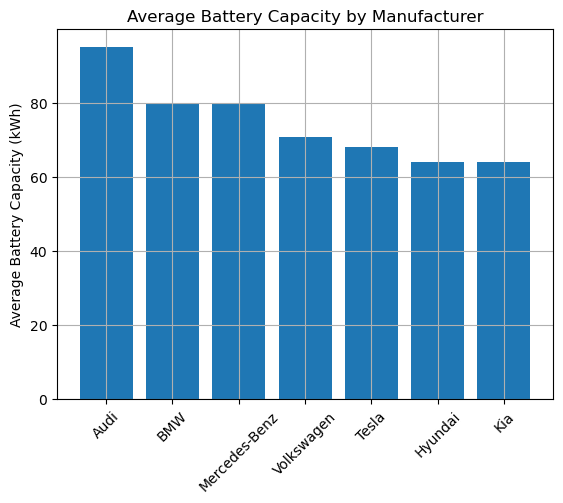

In [103]:
# Manufacture vs average battery capacity (budget <= 350000 and range >= 400)
plt.bar(result['make'],result['battery_capacity_[kwh]'])
plt.title("Average Battery Capacity by Manufacturer")
plt.ylabel("Average Battery Capacity (kWh)") 
plt.xticks(rotation=45)
plt.grid()
plt.show()

>**The EVs with a budget ≤ 350,000 PLN and a range ≥ 400 km**  
>Audi has the highest average battery capacity (95 kWh), followed by BMW and Mercedes-Benz (80 kWh each). Volkswagen, Tesla, Hyundai, and Kia have lower average capacities ranging from 70.67 kWh to 64 kWh.

In [104]:
# Create a new column for vehicle volume in m³
budget_range.loc[:,'volume_m3'] = (budget_range['length_[cm]']*
                             budget_range['width_[cm]']*
                             budget_range['height_[cm]']) / 1000000

C:\Users\ravir\AppData\Local\Temp\ipykernel_12160\3503926502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_range.loc[:,'volume_m3'] = (budget_range['length_[cm]']*


In [105]:
budget_range = budget_range.groupby('make').agg({
    'volume_m3':'mean',
    'number_of_seats':'mean',
    'number_of_doors':'mean'
}).reset_index()
result2 = budget_range.sort_values(by='volume_m3', ascending=False)
result2

,make,volume_m3,number_of_seats,number_of_doors
0,Audi,15.448516,5.0,5.0
1,BMW,14.931926,5.0,5.0
4,Mercedes-Benz,14.569891,5.0,5.0
5,Tesla,13.034448,5.0,5.0
6,Volkswagen,12.673080,5.0,5.0
3,Kia,12.219240,5.0,5.0
2,Hyundai,11.812680,5.0,5.0


>The analysis shows that Audi has the highest average vehicle volume (15.45 m³), followed by BMW (14.93 m³) and Mercedes-Benz (14.57 m³). Tesla, Volkswagen, Kia, and Hyundai have slightly lower volumes ranging from 13.03 m³ to 11.81 m³. All manufacturers have an average of 5 seats and 5 doors.

---
**Q2. We suspect some EVs have unusually high or low energy consumption.**  
Find the outliers in the mean - Energy consumption [kWh/100 km] column.

In [106]:
# renaming the column name for easier reference
df = df.rename(columns={'mean_-_energy_consumption_[kwh/100_km]':'energy_consumption'})

In [107]:
# calculate Q1 and Q3
Q1 = df['energy_consumption'].quantile(0.25)
Q3 = df['energy_consumption'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# determine outliers
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# find outliars
outliers = df[(df['energy_consumption']<lb) | (df['energy_consumption']>ub)]
print(outliers[['car_full_name','energy_consumption']])

Empty DataFrame
Columns: [car_full_name, energy_consumption]
Index: []


> - There is no outliers in energy consumption column.

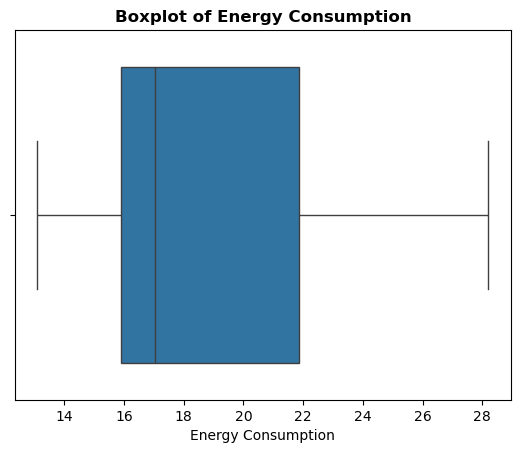

In [108]:
# plotting box plot
sns.boxplot(data=df, x='energy_consumption')
plt.title('Boxplot of Energy Consumption', fontweight='bold')
plt.xlabel('Energy Consumption')
plt.show()

---
**Q3. our manager wants to know if there's a strong relationship between battery capacity and range.**  
>**a)** Create a suitable plot to visualize.  
>**b)** Highlight any insights.

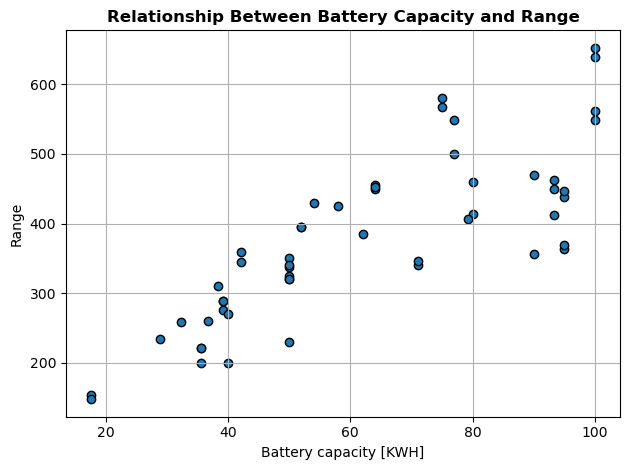

In [109]:
# displaying in scatterplot
plt.scatter(x=df['battery_capacity_[kwh]'],y=df['range_(wltp)_[km]'], edgecolors='k')
plt.title('Relationship Between Battery Capacity and Range', fontweight='bold')
plt.xlabel('Battery capacity [KWH]')
plt.ylabel('Range')
plt.grid()
plt.tight_layout()
plt.show()

## Highlight & insights.
1. **Positive Trend:** The plot shows a general upward trend, indicating that as battery capacity increases, the range tends to increase as well. This suggests a positive correlation between the two variables.
2. **Strength of the Relationship:**  While the relationship is generally positive, it’s not perfectly linear ➡️ some EVs with similar battery capacities have noticeably different ranges. ➡️ This variance might be influenced by other factors like energy efficiency, vehicle weight, Engine Power.
3. **Outliers:** Some cars in the graph are far away from most of the other points. This means they behave differently from the rest. For example, a few cars with around 100 kWh battery capacity can go much farther than others with the same battery size.
4. **Conclusion:** There is a strong positive relationship between battery capacity and range, which aligns with expectations—larger batteries generally store more energy and enable longer driving distances.



---
**Q4 Build an EV recommendation class.**  
>The class should allow users to input their budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria.

In [110]:
class EVRecommendation:
    def __init__(self,ev_data):
        self.data = ev_data

    def recommend(self):
        try:
            budget = float(input("Enter Your Budget:"))
            min_range = float(input("Enter Your Range:" ))
            battery = float(input("Enter Your Battery Capacity:"))
        except ValueError:
            print("Invalid input. Please Enter Number")
            return

        # Filter EVs that meet the user's criteria
        filters = self.data[
        (self.data['minimal_price_(gross)_[pln]'] <= budget) &
        (self.data['range_(wltp)_[km]'] >= min_range) &
        (self.data['battery_capacity_[kwh]'] >= battery)
        ]

        if filters.empty:
            print("No EVs match your criteria. Try adjusting your inputs.")
            return

        top_ev = filters.sort_values(by='battery_capacity_[kwh]', ascending=False).head(3)
        print("\n Top 3 Recommended EV:")
        print(top_ev[['car_full_name','minimal_price_(gross)_[pln]','range_(wltp)_[km]','battery_capacity_[kwh]']])

In [111]:
ev = EVRecommendation(df)
ev.recommend()

Enter Your Budget: 400000
Enter Your Range: 400
Enter Your Battery Capacity: 60



 Top 3 Recommended EV:
                       car_full_name  minimal_price_(gross)_[pln]  \
42     Tesla Model S Long Range Plus                       368990   
4   Audi e-tron Sportback 55 quattro                       357000   
0             Audi e-tron 55 quattro                       345700   

    range_(wltp)_[km]  battery_capacity_[kwh]  
42                652                   100.0  
4                 447                    95.0  
0                 438                    95.0  


In this task, we developed an EV recommendation system using a Python class named EVRecommendation.

## How It Works:
- The program prompts the user to enter their budget, desired range (km), and minimum battery capacity (kWh).   
- It filters the EV dataset to find vehicles that match all three criteria.
- If any matching EVs are found, it returns the top three based on highest driving range.
- If no matches are found, the system notifies the user to adjust their inputs.

---
**Q5: Inferential Statistics – Hypothesis Testing:** 
>Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. **Tesla and Audi**. What insights can you draw from the test results? Recommendations and Conclusion: Provide actionable insights based on your analysis. (Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [113]:
# filter the data from tesla and audi
tesla_power = df[df['make']=='Tesla']['engine_power_[km]']
audi_power = df[df['make']=='Audi']['engine_power_[km]']

In [114]:
# perform two sample t-test
t_state,p_value = ttest_ind(tesla_power,audi_power, equal_var=False)

#Print the result
print("T-statistic:", round(t_state,3))
print("P-value:", round(p_value,3))

# report format
alpha = 0.05 # significance level
if p_value < alpha:
    print("Significant difference in engine power between Tesla and Audi.")
else:
    print("No significant difference in engine power between Tesla and Audi.")

T-statistic: 1.794
P-value: 0.107
No significant difference in engine power between Tesla and Audi.


**Results:**  
**T-statistic: 1.794 P-value: 0.107 Significance level (α): 0.05**

Since the p-value (0.107) is greater than 0.05, we fail to reject the null hypothesis. This means there is no statistically significant difference in average engine power between Tesla and Audi EVs based on the data.